# SymPy Tutorial

SymForce is built on the [SymPy](https://sympy.org) API for symbolic algebra. If you're not familiar with SymPy or symbolic computation, go through [their](https://docs.sympy.org/latest/tutorial/index.html) tutorial.
Some basic usage is shown here.

First, some optional configuration - see [Symbolic APIs](#Symbolic-APIs) below for more information:

In [1]:
import symforce

symforce.set_symbolic_api("symengine")

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/setuptools_scm/git.py:167: UserWarning: "/home/runner/work/symforce/symforce" is shallow and may cause errors
  warnings.warn(f'"{wd.path}" is shallow and may cause errors')


Some imports that are useful for notebooks - you'll see these across many of our tutorials:

In [2]:
from symforce.notebook_util import display
from symforce.notebook_util import print_expression_tree
from symforce.notebook_util import set_notebook_defaults

set_notebook_defaults()

Always import the SymPy API through SymForce, because symforce can switch out the symbolic implementation of the API and adds a few minor but important augmentations.  [symforce.symbolic](../api/symforce.symbolic.html) includes both the supported parts of the underlying symbolic API, as well as all of the types from [symforce.geo](../api/symforce.geo.html) and [symforce.cam](../api/symforce.cam.html).  Let's define some algebraic symbols:

In [3]:
import symforce.symbolic as sf

x = sf.Symbol("x")
y = sf.Symbol("y")

Build a symbolic expression:

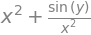

In [4]:
expr = x**2 + sf.sin(y) / x**2
display(expr)

This expression object is a tree of operations and arguments:

In [5]:
print_expression_tree(expr)

Add: sin(y)/x**2 + x**2
+-Pow: x**2
| +-Symbol: x
| +-Integer: 2
+-Mul: sin(y)/x**2
  +-Pow: x**(-2)
  | +-Symbol: x
  | +-Integer: -2
  +-sin: sin(y)
    +-Symbol: y


We can evaluate this numerically by plugging in values:

In [6]:
display(expr.subs({x: 1.2, y: 0.4}))

We can perform symbolic manipulation like differentiation, integration, simplifiation, etc..

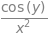

In [7]:
display(expr.diff(y))

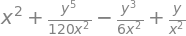

In [8]:
display(sf.series(expr, y))

## Symbolic APIs

SymForce supports two underling symbolic APIs.  The [SymPy](https://sympy.org) API is pure Python, and the [SymEngine](https://symengine.org) API is a C++ implementation of much of SymPy.  SymEngine is the default, and if you installed SymForce with `pip` or built it from source you'll have it already.  SymEngine is much faster than SymPy by a factor of 100 or more.  However, SymEngine doesn't implement everything SymPy does.  SymForce abstracts over some of these differences, and adds support for some operations by converting between SymEngine and SymPy calls.

For how to set the symbolic api, see the docs for [symforce.set_symbolic_api](../api/symforce.html#symforce.set_symbolic_api).